# Jyotsna Pandey

# Task 2 - Prediction using Unsupervised ML

# Importing Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [36]:
Iris = pd.read_csv("C:/Users/Admin/Downloads/Iris.csv")

In [37]:
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


I will be ignoring id column because it is not required

Checking for the frequency of classes in Species column

In [38]:
Iris["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

As per the Species column which is already present in our dataset, the data is divided into three clusters which are versicolor, setosa, virginica and each cluster consist of equal number of data points which is 50. Now our task is to classify the data into some number of groups based on the similarty among data and then we can compare our predictions with the given Species column.

In [39]:
Iris_data = Iris.drop(['Id'], axis=1)

In [40]:
Iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
Iris_data.shape

(150, 5)

In [42]:
Iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Checking for outliers 

Text(0.5, 1.0, 'PetalWidthCm')

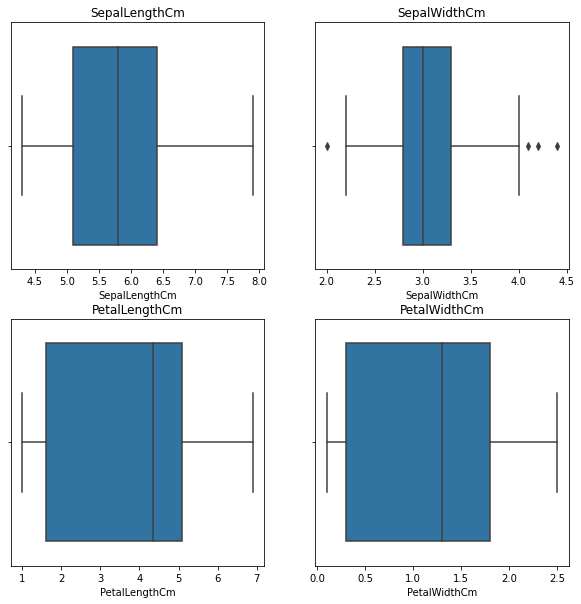

In [43]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
sns.boxplot(Iris_data["SepalLengthCm"], ax=ax[0,0])
ax[0,0].set_title("SepalLengthCm")
sns.boxplot(Iris_data["SepalWidthCm"], ax=ax[0,1])
ax[0,1].set_title("SepalWidthCm")
sns.boxplot(Iris_data["PetalLengthCm"], ax=ax[1,0])
ax[1,0].set_title("PetalLengthCm")
sns.boxplot(Iris_data["PetalWidthCm"], ax=ax[1,1])
ax[1,1].set_title("PetalWidthCm")

from the plot we can see that few outliers are present in SepalWidthCm

Now checking for distribution of values in each column

Text(0.5, 1.0, 'PetalWidthCm')

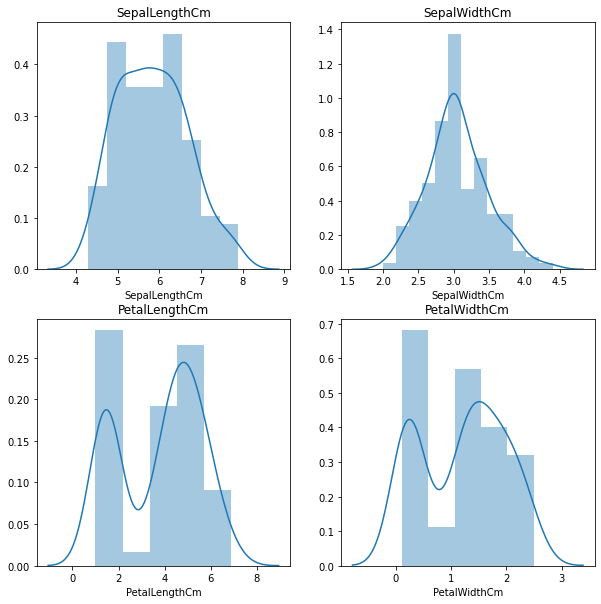

In [44]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
sns.distplot(Iris_data["SepalLengthCm"], ax=ax[0,0])
ax[0,0].set_title("SepalLengthCm")
sns.distplot(Iris_data["SepalWidthCm"], ax=ax[0,1])
ax[0,1].set_title("SepalWidthCm")
sns.distplot(Iris_data["PetalLengthCm"], ax=ax[1,0])
ax[1,0].set_title("PetalLengthCm")
sns.distplot(Iris_data["PetalWidthCm"], ax=ax[1,1])
ax[1,1].set_title("PetalWidthCm")

Checking for correlation among columns

In [47]:
cor = Iris_data.corr()
cor

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Plotting heatmap plot for visualising correlation

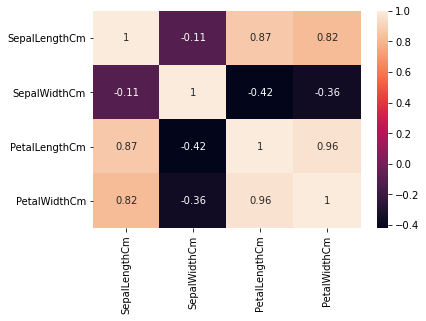

In [48]:
sns.heatmap(cor, annot=True)

there is very high correlation exist between petal length and petal width

# Applying Kmeans clustering

# Scree plot

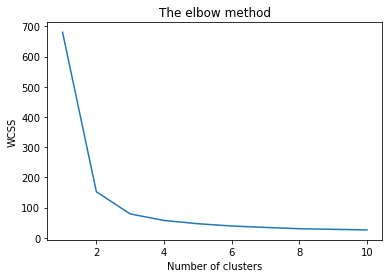

In [52]:
# Finding the optimum number of clusters for k-means classification

x = Iris_data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

From the plot we  can see that we are getting elbow of the plot at 3 so i will those k value as 3

In [57]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

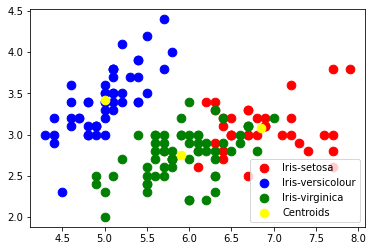

In [59]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 75, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 75, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 75, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 75, c = 'yellow', label = 'Centroids')

plt.legend()